In [1]:
import ptlib

Loading BokehJS ...

In [2]:
!ls

3Dviwer.py                    step-dist.png
MurA_enzyme_template.par      test.par
Untitled.ipynb                test.par_msd.pdf
cell_test_Substrate.pt_xy.pdf test.par_steps.pdf
cell_xy_test_Substrate.pt.pdf test_Enzym_MSD.svg
cloud_log.txt                 test_Enzyme.pt
pointAnimation.py             test_Substrat_MSD.svg
pointViewer.py                test_Substrate.pt
run.sh                        test_count.txt


In [3]:
c = ptlib.CELL(parfilename='test.par')
c.add_ptfile('test_Substrate.pt')
c.add_ptfile('test_Enzyme.pt')

... time step: 0.001 [sec]
... final time: 1.0 [sec]
... total iteration: 1000
... cell radius: 1.0 [um]
... cell length: 6.0 [um]
... test_Substrate.pt - Total tracks : 3468 [0 - 3467]
... test_Enzyme.pt - Total tracks : 3468 [0 - 3467]


In [4]:
#c.plot_MSD()

tracks:   1%|▎                              | 35/3468 [00:00<00:09, 343.75it/s]

... percentile 85 : 1.294
[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 42
    # data points      = 83
    # variables        = 2
    chi-square         = 0.01189562
    reduced chi-square = 1.4686e-04
    Akaike info crit   = -730.585331
    Bayesian info crit = -725.747650
[[Variables]]
    exponent:  -5.18706032 +/- 0.12065531 (2.33%) (init = -9.65162)
    amplitude:  2.03843073 +/- 0.08116727 (3.98%) (init = 26.37805)
[[Correlations]] (unreported correlations are < 0.250)
    C(exponent, amplitude) = -0.948



tracks: 100%|██████████████████████████████| 3468/3468 [00:31<00:00, 53.06it/s]


... percentile 85 : 1.649
[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 144
    # data points      = 66
    # variables        = 2
    chi-square         = 0.00588087
    reduced chi-square = 9.1889e-05
    Akaike info crit   = -611.496510
    Bayesian info crit = -607.117201
[[Variables]]
    exponent:  -5.50998329 +/- 0.10141899 (1.84%) (init = -15.98624)
    amplitude:  6.91957482 +/- 0.40727467 (5.89%) (init = 36950.99)
[[Correlations]] (unreported correlations are < 0.250)
    C(exponent, amplitude) = -0.985

... save to test.par_steps.pdf


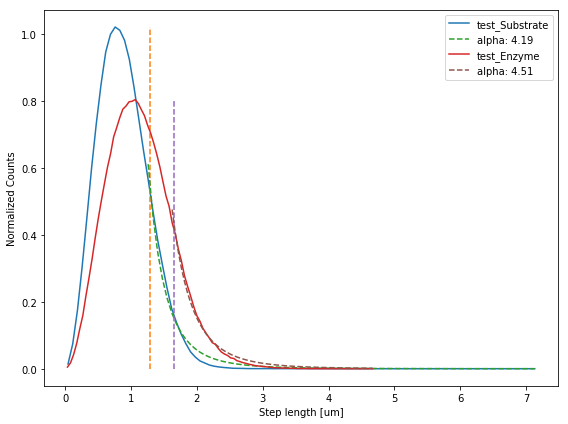

In [5]:
(y, x, steps) = c.plot_stepdistribution(percentile=85)
#pt = c.get()

In [6]:
#res = pt.cal_steps()

In [7]:
import numpy as np
import lmfit
import matplotlib.pyplot as plt

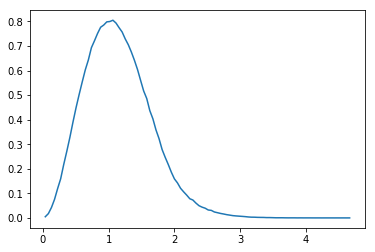

In [8]:
xn = 0.5*(x[:-1]+x[1:])
plt.plot(xn, y)

In [9]:
from lmfit.models import PowerLawModel

In [10]:
i_near=abs(x-np.percentile(steps,75,interpolation='nearest')).argmin()
print(i_near)

mod = PowerLawModel()

pars = mod.guess(y[i_near:], x=xn[i_near:])
out = mod.fit(y[i_near:], pars, x=xn[i_near:])
print(out.fit_report(min_correl=0.25))

31
[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 127
    # data points      = 69
    # variables        = 2
    chi-square         = 0.02293792
    reduced chi-square = 3.4236e-04
    Akaike info crit   = -548.625864
    Bayesian info crit = -544.157651
[[Variables]]
    exponent:  -4.69373139 +/- 0.11951866 (2.55%) (init = -14.82493)
    amplitude:  4.02571486 +/- 0.24701396 (6.14%) (init = 8793.525)
[[Correlations]] (unreported correlations are < 0.250)
    C(exponent, amplitude) = -0.973



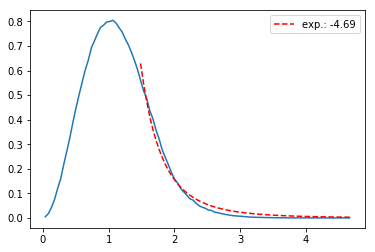

In [11]:
msg = 'exp.: %.2f' % out.best_values['exponent']
plt.plot(xn, y)
plt.plot(xn[i_near:], out.best_fit, 'r--', label=msg)
plt.legend()

In [12]:
out.best_values

{'exponent': -4.693731392113271, 'amplitude': 4.025714863460182}